In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=4e645f43fe27415d81b7e806d7c56108efa12d59e619f2827f91c21842a7bca1
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import pandas as pd

In [6]:
import wikipedia
articles=['Deep Learning','Artificial Intelligence', 'European Central Bank', 'Bank','International Monetary Fund','Basketball','Cricket']
wiki_lst=[]
title=[]
for article in articles:
  print("loading content:",article)
  wiki_lst.append(wikipedia.page(article).content)
  title.append(article)
print("examine content")
wiki_lst[:100]#first qpp tokens

loading content: Deep Learning
loading content: Artificial Intelligence
loading content: European Central Bank
loading content: Bank
loading content: International Monetary Fund
loading content: Basketball
loading content: Cricket
examine content


['Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences fro

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words=['english'])
X=vectorizer.fit_transform(wiki_lst)

In [9]:
print(vectorizer.get_feature_names_out())
print(X.shape)

['00' '000' '0001' ... 'zuckerberg' 'être' 'čapek']
(7, 7612)


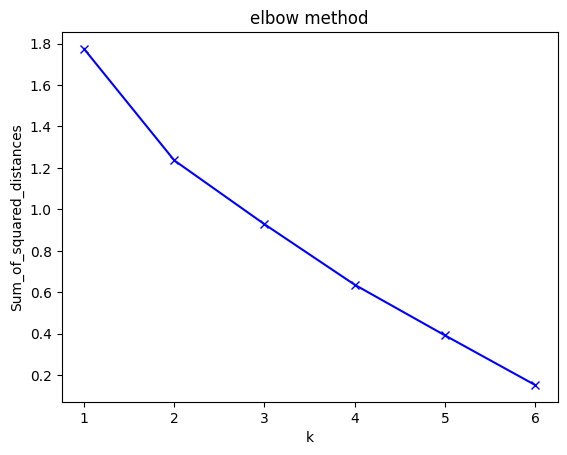

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Sum_of_squared_distances=[]
K=range(1,7)
for k in K:
  km=KMeans(n_clusters=k,max_iter=200,n_init=100)
  km=km.fit(X)
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('elbow method')
plt.show()

In [12]:
true_k=3
model=KMeans(n_clusters=true_k,init='k-means++',max_iter=200,n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
5                   Basketball        0
6                      Cricket        0
2        European Central Bank        1
3                         Bank        1
4  International Monetary Fund        1
0                Deep Learning        2
1      Artificial Intelligence        2


In [ ]:
#why is it 3?


Cluster:0
Titles
Basketball
   Cricket


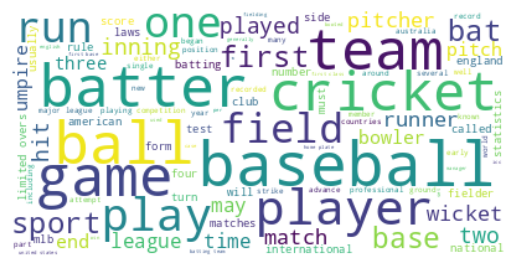

Cluster:1
Titles
      European Central Bank
                       Bank
International Monetary Fund


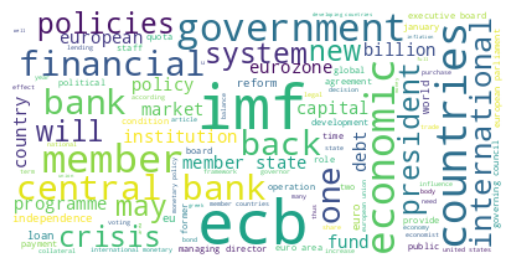

Cluster:2
Titles
          Deep Learning
Artificial Intelligence


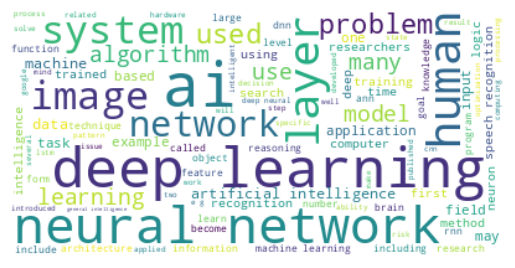

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
  s=result[result.cluster==k]
  text=s['wiki'].str.cat(sep=' ')
  text=text.lower()
  text=' '.join([word for word in text.split()])
  wordcloud=WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
  print('Cluster:{}'.format(k))
  print('Titles')
  titles=wiki_cl[wiki_cl.cluster==k]['title']
  print(titles.to_string(index=False))
  plt.figure()
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [17]:
!pip install yake
!pip install keybert
import yake
doc="""Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias)."""
kw_extractor=yake.KeywordExtractor()
keywords=kw_extractor.extract_keywords(doc)
for kw in keywords:
  print(kw)

('machine learning task', 0.022703501568910843)
('Supervised learning', 0.06742808121232775)
('learning', 0.07245709008069999)
('training data', 0.07557730010583494)
('maps an input', 0.07860851277995791)
('output based', 0.08846540097554569)
('input-output pairs', 0.08846540097554569)
('machine learning', 0.09853013116161088)
('learning task', 0.09853013116161088)
('training', 0.10592640317285314)
('function', 0.11237403107652318)
('training data consisting', 0.12165867444610523)
('learning algorithm', 0.1280547892393491)
('Supervised', 0.12900350398758118)
('supervised learning algorithm', 0.13060566752120165)
('data', 0.1454043828185849)
('labeled training data', 0.15052764655360493)
('algorithm', 0.15633092600586776)
('input', 0.17662443762709562)
('pair consisting', 0.19020472807220248)


In [24]:
import spacy
from collections import Counter
from string import punctuation
nlp=spacy.load("en_core_web_sm")
def get_hotwords(text):
  result=[]
  pos_tag=['PROPN','ADJ','NOUN']
  doc=nlp(text.lower())
  for token in doc:
    if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)
  return result
output=set(get_hotwords(doc))
most_common_list=Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

scenario
vector
input
bias
examples
class
supervised
way
new
set


In [31]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)
print(keywords)

[('supervised', 0.6676), ('labeled', 0.4896), ('learning', 0.4813), ('training', 0.4134), ('labels', 0.3947)]


In [36]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

tokens = [token.text for token in doc]
print(tokens)

['deep', 'learning', 'is', 'part', 'of', 'a', 'broader', 'family', 'of', 'machine', 'learning', 'methods', ',', 'which', 'is', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'the', 'adjective', '"', 'deep', '"', 'in', 'deep', 'learning', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.', 'methods', 'used', 'can', 'be', 'either', 'supervised', ',', 'semi', '-', 'supervised', 'or', 'unsupervised.deep', '-', 'learning', 'architectures', 'such', 'as', 'deep', 'neural', 'networks', ',', 'deep', 'belief', 'networks', ',', 'deep', 'reinforcement', 'learning', ',', 'recurrent', 'neural', 'networks', ',', 'convolutional', 'neural', 'networks', 'and', 'transformers', 'have', 'been', 'applied', 'to', 'fields', 'including', 'computer', 'vision', ',', 'speech', 'recognition', ',', 'natural', 'language', 'processing', ',', 'machine', 'translation', ',', 'bioinformatics', ',', 'drug', 'design', ',', 'medical', 'image',

In [40]:
punctuation=punctuation+'\n'
punctuation
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text]=1
      else:
        word_frequencies[word.text]+=1
print(word_frequencies)

{'deep': 154, 'learning': 184, 'broader': 2, 'family': 1, 'machine': 52, 'methods': 30, 'based': 35, 'artificial': 70, 'neural': 100, 'networks': 88, 'representation': 10, 'adjective': 1, 'refers': 5, 'use': 30, 'multiple': 11, 'layers': 42, 'network': 54, 'supervised': 7, 'semi': 3, 'unsupervised.deep': 1, 'architectures': 14, 'belief': 7, 'reinforcement': 5, 'recurrent': 9, 'convolutional': 12, 'transformers': 4, 'applied': 16, 'fields': 7, 'including': 19, 'computer': 33, 'vision': 12, 'speech': 39, 'recognition': 57, 'natural': 9, 'language': 23, 'processing': 29, 'translation': 8, 'bioinformatics': 3, 'drug': 4, 'design': 6, 'medical': 10, 'image': 44, 'analysis': 13, 'climate': 1, 'science': 8, 'material': 2, 'inspection': 1, 'board': 2, 'game': 6, 'programs': 9, 'produced': 7, 'results': 12, 'comparable': 2, 'cases': 5, 'surpassing': 2, 'human': 62, 'expert': 2, 'performance.artificial': 1, 'anns': 7, 'inspired': 7, 'information': 22, 'distributed': 2, 'communication': 1, 'nodes

In [44]:
max_freq=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_freq
print(word_frequencies)

{'deep': 0.8369565217391305, 'learning': 1.0, 'broader': 0.010869565217391304, 'family': 0.005434782608695652, 'machine': 0.2826086956521739, 'methods': 0.16304347826086957, 'based': 0.19021739130434784, 'artificial': 0.3804347826086957, 'neural': 0.5434782608695652, 'networks': 0.4782608695652174, 'representation': 0.05434782608695652, 'adjective': 0.005434782608695652, 'refers': 0.02717391304347826, 'use': 0.16304347826086957, 'multiple': 0.059782608695652176, 'layers': 0.22826086956521738, 'network': 0.29347826086956524, 'supervised': 0.03804347826086957, 'semi': 0.016304347826086956, 'unsupervised.deep': 0.005434782608695652, 'architectures': 0.07608695652173914, 'belief': 0.03804347826086957, 'reinforcement': 0.02717391304347826, 'recurrent': 0.04891304347826087, 'convolutional': 0.06521739130434782, 'transformers': 0.021739130434782608, 'applied': 0.08695652173913043, 'fields': 0.03804347826086957, 'including': 0.10326086956521739, 'computer': 0.1793478260869565, 'vision': 0.0652

In [46]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning., the adjective "deep" in deep learning refers to the use of multiple layers in the network., methods used can be either supervised, semi-supervised or unsupervised.deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.artificial neural networks (anns) were inspired by information processing and distributed communication nodes in biological systems., anns have various differences f

In [55]:
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

sentence_scores

{deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning.: 5.945652173913043,
 the adjective "deep" in deep learning refers to the use of multiple layers in the network.: 3.4510869565217392,
 methods used can be either supervised, semi-supervised or unsupervised.deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.artificial neural networks (anns) were inspired by information processing and distributed communication nodes in biological 

In [53]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*0.3)
select_length

189

In [56]:
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
summary

[== see also == ai safety – research area on making ai safe and beneficial ai alignment – conformance to the intended objective artificial intelligence in healthcare – machine-learning algorithms and software in the analysis, presentation, and comprehension of complex medical and health care data artificial intelligence arms race – arms race for the most advanced ai-related technologies artificial intelligence detection software behavior selection algorithm – algorithm that selects actions for intelligent agents business process automation – technology-enabled automation of complex business processes case-based reasoning – process of solving new problems based on the solutions of similar past problems emergent algorithm – algorithm exhibiting emergent behavior female gendering of ai technologies glossary of artificial intelligence – list of definitions of terms and concepts commonly used in the study of artificial intelligence operations research – discipline concerning the application

In [67]:
final_summary = [word for word in summary]
summary = ' '.join(final_summary)

In [58]:
!pip install transformers

In [ ]:
'''import transformers
summarizer=transformers.pipeline("summarization")
summarized=summarizer(text, min_length=75, max_length=300)'''

In [62]:
print(text)

deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. the adjective "deep" in deep learning refers to the use of multiple layers in the network. methods used can be either supervised, semi-supervised or unsupervised.deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.artificial neural networks (anns) were inspired by information processing and distributed communication nodes in biological systems. anns have various differences from 

In [ ]:
len(summarized)